<a href="https://colab.research.google.com/github/p82maavd/MIML/blob/main/src/miml/tutorial/classifiers_comparison_experiment_miml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installation of library


In [ ]:
!pip install mimllearning

# Loading of datasets

In [2]:
from miml.datasets import load_dataset

# dataset = load_dataset("miml_birds.csv"))
# dataset = load_dataset("C:\Users\Damián\Downloads\miml_birds.arff")
# dataset = load_dataset(pkg_resources.resource_filename('miml', 'datasets/miml_birds'))
dataset = load_dataset("miml_birds.arff", from_library=True)

dataset_train, dataset_test = dataset.split_dataset(train_percentage=0.8, seed=7)

# Run the classifiers


In [3]:
from miml.classifier import MIMLtoMLClassifier, MIMLtoMIBRClassifier, MIMLtoMILPClassifier, APRClassifier, MIWrapperClassifier
from miml.transformation import ArithmeticTransformation, GeometricTransformation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from miml.report import Report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


classifiers = [
    MIMLtoMLClassifier(KNeighborsClassifier(3), GeometricTransformation()),
    MIMLtoMLClassifier(DecisionTreeClassifier(), ArithmeticTransformation()),
    MIMLtoMIBRClassifier(APRClassifier()),
    MIMLtoMILPClassifier(MIWrapperClassifier())]

log_cols=["Classifier", "Subset Accuracy", "Precision Macro", "Hamming Loss"]
log = pd.DataFrame(columns=log_cols)

for classifier in classifiers:

  name = classifier.__class__.__name__+" "+classifier.classifier.__class__.__name__

  classifier.fit(dataset_train)
  results = classifier.evaluate(dataset_test)
  probs = classifier.predict_proba(dataset_test)
  report = Report(results, probs, dataset_test)
  report.calculate_metrics()
  log_entry = pd.DataFrame([[name, report.metrics_value["subset-accuracy-score"], report.metrics_value["precision-score-macro"], report.metrics_value["hamming-loss"]]], columns=log_cols)
  log = pd.concat([log, log_entry], ignore_index=True)


# Showing results

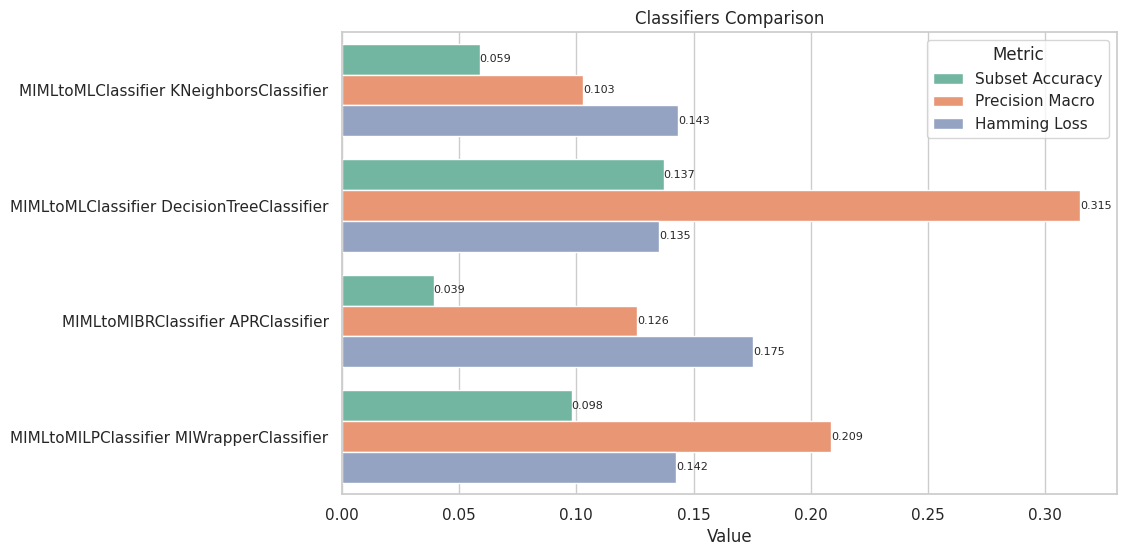

In [7]:
# Melt the DataFrame for easier plotting
log_melted = pd.melt(log, id_vars=["Classifier"], value_vars=["Subset Accuracy", "Precision Macro", "Hamming Loss"],
                     var_name="Metric", value_name="Value")

# Plot the data
sns.set_theme(style="whitegrid", palette="Set2")

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Value", y="Classifier", hue="Metric", data=log_melted)
barplot.bar_label(barplot.containers[0], fontsize=8, fmt='%.3f')
barplot.bar_label(barplot.containers[1], fontsize=8, fmt='%.3f')
barplot.bar_label(barplot.containers[2], fontsize=8, fmt='%.3f')

# sns.despine(left=True, bottom=True)

plt.xlabel('Value')
plt.ylabel("")
plt.title('Classifiers Comparison')
plt.legend(title='Metrics')

plt.show()